In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
single = pd.read_csv("single.csv")
single['I']=single['I']+1

In [6]:
mins=getPoints('min',single['x'],single['I'])
maxes=getPoints('max',single['x'],single['I'])
mins2 = pd.DataFrame({'x': mins[0], 'y': mins[1]})  
maxes2 = pd.DataFrame({'x': maxes[0], 'y': maxes[1]})

In [7]:
mins2


,x,y
0,209.6,1.0
1,208.0,1.0
2,205.4,2.0
3,202.8,2.0
4,200.6,11.0
5,195.6,11.0
6,193.4,2.0
7,191.4,2.0
8,189.0,1.0
9,188.0,1.0


In [8]:
maxes2

,x,y
0,208.6,1.4
1,206.4,4.0
2,204.0,11.0
3,201.4,45.0
4,198.2,1441.0
5,194.8,38.0
6,192.6,10.0
7,190.4,4.0
8,188.8,2.0
9,187.8,2.0


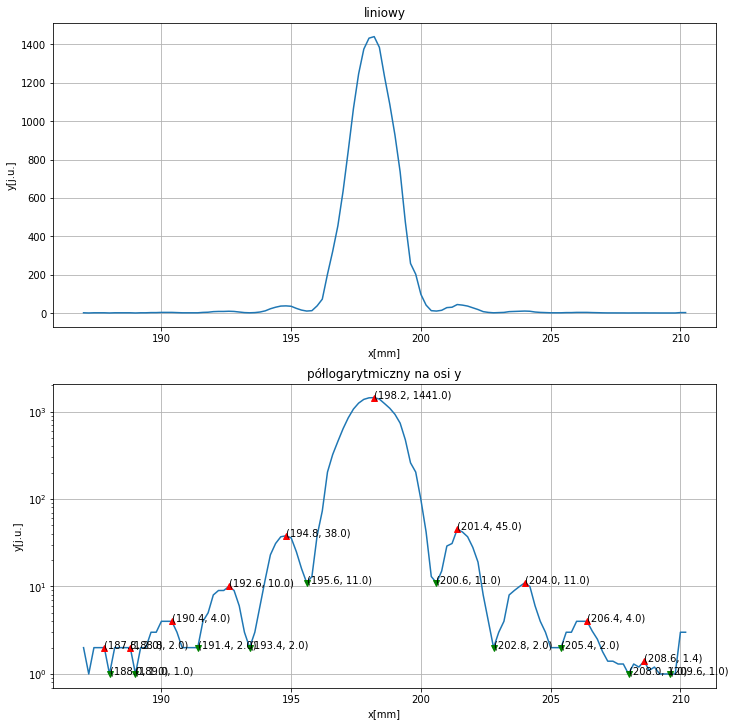

In [9]:
plt.figure(figsize=(10,10))
plt.subplot("211")
plt.xlabel('x[mm]')
plt.ylabel('y[j.u.]')
plt.grid(True)
plt.title('liniowy')
plt.plot(single['x'],single['I'])

plt.subplot("212")
plt.xlabel('x[mm]')
plt.ylabel('y[j.u.]')



plt.semilogy(single['x'], single['I'])

ma = plt.plot(maxes[0],maxes[1],'^',c="red")
plt.plot(mins[0],mins[1],'v',c='green')
for xy in zip(maxes[0], maxes[1]):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
for xy in zip(mins[0], mins[1]):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
plt.title('półlogarytmiczny na osi y')
plt.grid(True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('single.pgf')
plt.show()


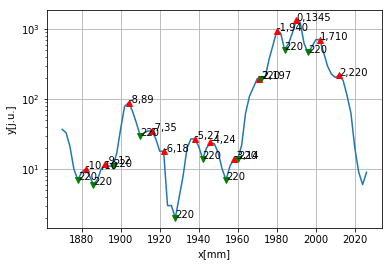

In [10]:
single = pd.read_csv("double.csv")
plt.xlabel('x[mm]')
plt.ylabel('y[j.u.]')
plt.grid(True)
plt.plot(single['x'],single['I'])
mins=getPoints('min',single['x'],single['I'],2)
maxes=getPoints('max',single['x'],single['I'],2)
maxes[0].append(1971)
maxes[1].append(197)
maxes[0].append(1958)
maxes[1].append(14)
z= zip(maxes[0], maxes[1])
z=sorted(z, key=lambda x: x[0])
maxes=([ a for a,b in z ], [ b for a,b in z ])
plt.semilogy(maxes[0],maxes[1],'^',c="red")
plt.semilogy(mins[0],mins[1],'v',c='green')
for (x,y) in zip(maxes[0], maxes[1]):                                       # <--
    plt.annotate('%s,%s' % ((maxes[0].index(x)-10),y), xy=(x,y), textcoords='data') # <--
for xy in zip(mins[0], mins[1]):                                       # <--
    plt.annotate('%s' % y, xy=xy, textcoords='data') # <--

plt.grid(True)

plt.savefig('double.pgf')
plt.show()


# tu masz wykres tych maksimów ze szczeliny podwójnej, a poniżej w tabelce ich wartości

In [ ]:
df = pd.DataFrame({'x': maxes[0], 'y': maxes[1]},index=range(-10,3))  

In [ ]:
df

In [5]:
def getPoints(oftype,x,y,radius=3):
    
    xr=[]
    yr=[]
    appended=False
    for i in range(radius,len(x)-radius):
        pts=[]
        for j in range(-radius,radius):
           
            pts.append(y[i+j])
        if((min(pts)==y[i] and oftype=='min') or (max(pts)==y[i] and oftype=='max')):
            if(not appended):
                xr.append(x[i])
                yr.append(y[i])
            appended=True
        else:
            appended=False
    return xr,yr